### 类的方法
#### 类的私有方法

类也有私有方法。类的私有方法也是以两个下划线开头，声明该方法为私有方法，不能再类外使用。 私有方法的调用方法为self.方法名

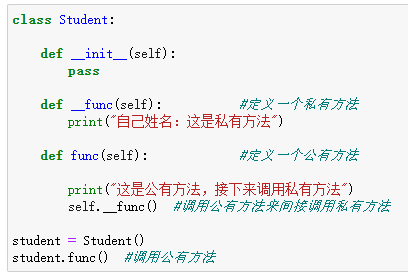

In [1]:
class Student: 
    def __init__(self):
        pass

    def __func(self):
        print('罗潘裕：这是私有方法')

    def func(self):
        print('这是公有方法,调用私有方法')
        self.__func()

student = Student()
student.func()

这是公有方法,调用私有方法
罗潘裕：这是私有方法


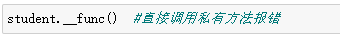

In [2]:
student.__func()

AttributeError: 'Student' object has no attribute '__func'

### self用法

注意：

1、__init__ 方法的第一个参数永远是 self ，表示创建的实例本身，因此，在 __init__ 方法的内部，就可以把各种属性绑定到 self，因为 self 就指向创建的 实例本身

2、使用了 __init__ 方法，在创建实例的时候就不能传入 空的参数了，必须传入与 __init__ 方法匹配的参数，但是 self 不需要传，python解释器会自己把实例变量传进去

在类中定义多个函数相互调用

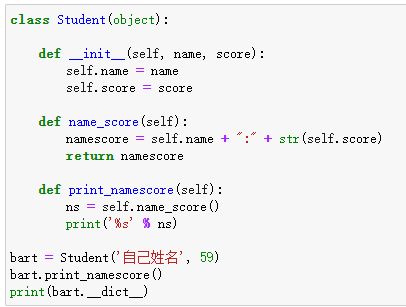

In [3]:
class Student(object):

    def __init__(self, name, score):
        self.name = name
        self.score = score

    def name_score(self):
        name_score = self.name + ":" + str(self.score)
        return name_score

    def print_name_score(self):
        ns = self.name_score()
        print('%s' % ns)

bart = Student('罗潘裕', 59)
bart.print_name_score()
print(bart.__dict__)

罗潘裕:59
{'name': '罗潘裕', 'score': 59}


通过上述的例子可以看出，与普通的函数相比，在类中定义的函数只有两点点不同：

1、第一个参数永远是 self ，并且调用时不用传递该参数

2、在类中函数相互调用要加 self ，如上例中： namescore = self.name + ":" + str(self.score), 不加 self ，会报错： 函数未定义，看下图

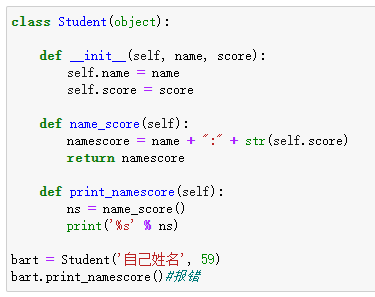

In [6]:
class Student(object):
    def __init__(self, name, score):
        self.name = name
        self.score = score

    def name_score(self):
        name_score = self.name + ":" + str(self.__score)
        return name_score

    def print_name_score(self):
        ns = name_score()
        print('%s' % ns)

bart = Student('罗潘裕', 59)
bart.print_name_score()

NameError: name 'name_score' is not defined

### 练习：根据如下代码的注释，完成各方法的实现代码：

In [8]:
class Testsq(object):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    #实现x和y相加： x+y
    def add(self):
        return self.x + self.y

        
    #实现x的平方和y的平方相加：x^2+y^2
    def square(self):
        return self.x**2 + self.y**2

       
    #通过调用上面两个方法，实现：x+y+x^2+y^2
    def add_square(self):
        return self.add() + self.square()

        

测试的代码及输出如下：

In [77]:
sq = Testsq(3,4)
print(sq.add())
print(sq.square())
print(sq.add_square())
print(sq.__dict__)

7
25
32
{'x': 3, 'y': 4}


In [9]:
sq = Testsq(3,4)
print(sq.add())
print(sq.square())
print(sq.add_square())
print(sq.__dict__)

7
25
32
{'x': 3, 'y': 4}


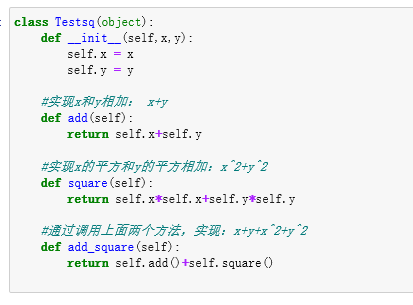

### 继承和多态
在OOP程序设计中，当我们定义一个class的时候，可以从某个现有的class继承，新的class称为子类（Subclass），而被继承的class称为基类、父类或超类（Base class、Super class）。

比如，我们已经编写了一个名为Animal的class，有一个run()方法可以直接打印：

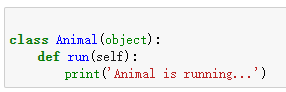

In [10]:
class Animal(object):
    def run(self):
        print('Animal is running...')

当我们需要编写Dog和Cat类时，就可以直接从Animal类继承：

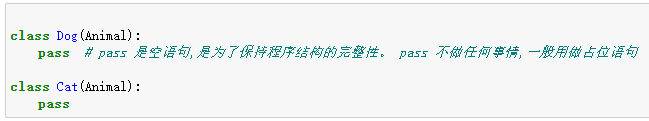

In [11]:
class Dog(Animal):
    pass

class Cat(Animal):
    pass

对于Dog来说，Animal就是它的父类，对于Animal来说，Dog就是它的子类。Cat和Dog类似。

继承有什么好处？最大的好处是子类获得了父类的全部功能。由于Animial实现了run()方法，因此，Dog和Cat作为它的子类，什么事也没干，就自动拥有了run()方法：

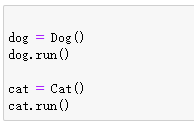

In [12]:
dog = Dog()
dog.run()

cat = Cat()
cat.run()


Animal is running...
Animal is running...


当然，也可以对子类增加一些方法，比如Dog类：

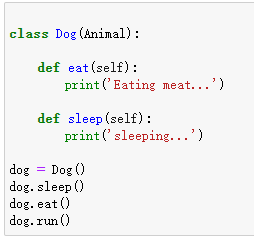

In [13]:
class Dog(Animal):
    def eat(self):
        print('Eating meat...')

    def sleep(self):
        print('sleeping...')

dog = Dog()
dog.sleep()
dog.eat()
dog.run()

sleeping...
Eating meat...
Animal is running...


继承的第二个好处需要我们对代码做一点改进。你看到了，无论是Dog还是Cat，它们run()的时候，显示的都是Animal is running...，符合逻辑的做法是分别显示Dog is running...和Cat is running...，因此，对Dog和Cat类改进如下：

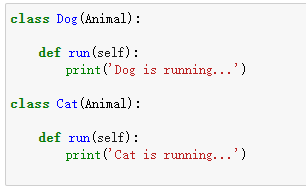

In [15]:
class Dog(Animal):
    def run(self):
        print('Dog is running...')

class Cat(Animal):
    def run(self):
        print('Cat is running...')

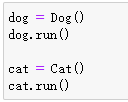

In [16]:
dog = Dog()
dog.run()

cat = Cat()
cat.run()

Dog is running...
Cat is running...


当子类和父类都存在相同的run()方法时，我们说，子类的run()覆盖了父类的run()，在代码运行的时候，总是会调用子类的run()。这样，我们就获得了继承的另一个好处：多态。

要理解什么是多态，我们首先要对数据类型再作一点说明。当我们定义一个class的时候，我们实际上就定义了一种数据类型。我们定义的数据类型和Python自带的数据类型，比如str、list、dict没什么两样：

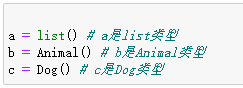

In [17]:
a = list()
b = Animal()
c = Dog()

判断一个变量是否是某个类型可以用isinstance()判断：

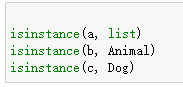

In [18]:
isinstance(a, list)
isinstance(b, Animal)
isinstance(c, Dog)

True

看来a、b、c确实对应着list、Animal、Dog这3种类型。

但是等等，试试：

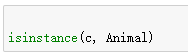

In [19]:
isinstance(c, Animal)

True

看来c不仅仅是Dog，c还是Animal！

不过仔细想想，这是有道理的，因为Dog是从Animal继承下来的，当我们创建了一个Dog的实例c时，我们认为c的数据类型是Dog没错，但c同时也是Animal也没错，Dog本来就是Animal的一种！

所以，在继承关系中，如果一个实例的数据类型是某个子类，那它的数据类型也可以被看做是父类。但是，反过来就不行：

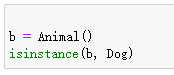

In [20]:
b = Animal()
isinstance(b, Dog)

False

Dog可以看成Animal，但Animal不可以看成Dog。

### 练习：写Student类继承自Person，实现如下打印输出：
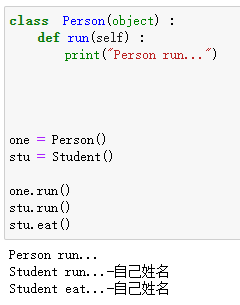

In [21]:
class Person(object):
    def run(self):
        print('Person is running...')

class Student(Person):
    def run(self):
        print('Student is running...-罗潘裕')
    
    def eat(self):
        print('Student is eating...-罗潘裕')

one = Person()
stu = Student()

one.run()
stu.run()
stu.eat()

Person is running...
Student is running...-罗潘裕
Student is eating...-罗潘裕


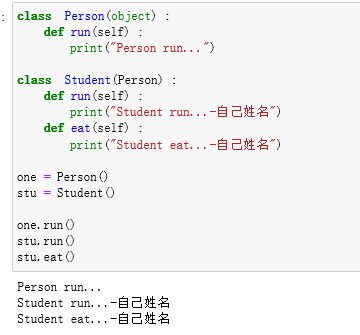

### super函数
super() 函数是用于调用父类(超类)的一个方法。

在子类中引用父类的属性，我们可以通过“父类名.属性名”的方式来调用，代码如下：

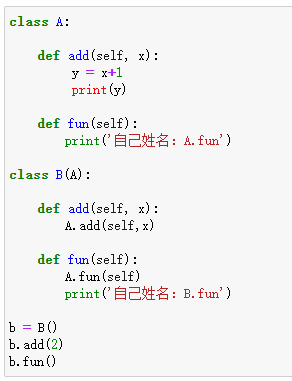

In [23]:
class A:
    def add(self, x):
        y = x+1
        print(y)
    
    def fun(self):
        print('罗潘裕:A.fun')

class B(A):
    def add(self, x):
        A.add(self,x)

    def fun(self):
        A.fun(self)
        print('罗潘裕:B.fun')

b = B()
b.add(2)
b.fun()

3
罗潘裕:A.fun
罗潘裕:B.fun


上述代码中，在子类B中调用了父类A的方法，这时候如果我们改变了A类的类名也只需要在B类中修改一下就好了，但是如果有几十上百个类继承了A类呢？一旦A类类名改了，我们就要分别到那几十上百个子类中修改，不但要改继承时用到的A类名，调用A类方法时用到的A类名也要改，繁琐的很，用super就好多了：

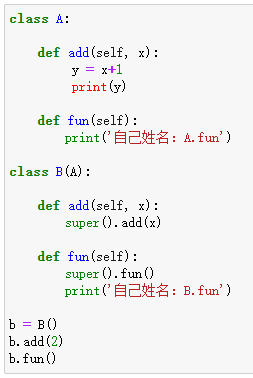

In [24]:
class A:
    def add(self, x):
        y = x+1
        print(y)
    
    def fun(self):
        print('罗潘裕:A.fun')

class B(A):
    def add(self, x):
        super().add(x)

    def fun(self):
        super().fun()
        print('罗潘裕:B.fun')

b = B() 
b.add(2)
b.fun()

3
罗潘裕:A.fun
罗潘裕:B.fun


这时候，就算A类类名改了，也只需要在子类声明继承关系时修改就好了，简单得大多。

#### super(type , obj)

super(type , obj)，这个方式要传入两个常数，第一个参数type必须是一个类名，第二个参数是一个该类的实例化对象，不过可以不是直接的实例化对象，该类的子类的实例化对象也行。

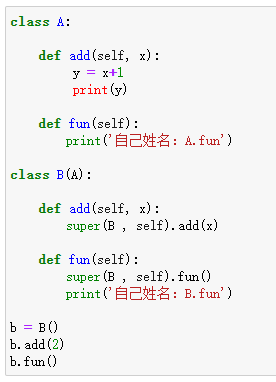

In [25]:
class A:
    def add(self, x):
        y = x+1
        print(y)
    
    def fun(self):
        print('罗潘裕:A.fun')

class B(A):
    def add(self, x):
        super(B,self).add(x)

    def fun(self):
        super(B,self).fun()
        print('罗潘裕:B.fun')

b = B()
b.add(2)
b.fun()

3
罗潘裕:A.fun
罗潘裕:B.fun


# 练习： 写Student类继承自Person，实现如下打印输出：Student类通过super调用Person类的run方法
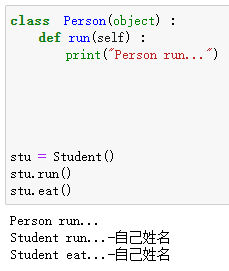

In [28]:
class Person(object):
    def run(self):
        print('Person is running...')

class Student(Person):
    def run(self):
        # super().run()
        super(Student,self).run()
        print('Student is running...-罗潘裕')

    def eat(self):
        print('Student is eating...-罗潘裕')
student = Student()
student.run()
student.eat()
    

Person is running...
Student is running...-罗潘裕
Student is eating...-罗潘裕


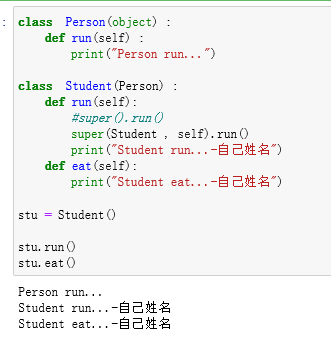